# Model Numerical Double Upconversion

In [2]:
from whitepeaks import *

Example notebook for calculting the JTI observed using optical gating. It uses the sfg module in the whitepeaks framework.

Use to investigate optical gating SPDC photons including phase-matching. 

## Phase matching for BiBO

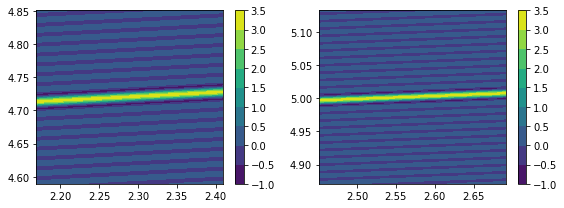

In [3]:
L=1e3
cr=crystal.BiBO()
angle=151.3
extra_ordinary=[angle,cr.ny,cr.nz] #Extra-ordinary
ordinary=cr.nx #Ordinary 

lambda_i0,sigma_li=0.82251,0.00409 #idler
lambda_s0,sigma_ls=0.7324,0.00353   #signal
lambda_g0,sigma_lg=0.775,0.00177 #

wi0,sigma_i=w2f(lambda_i0,dx=sigma_li)
ws0,sigma_s=w2f(lambda_s0,dx=sigma_ls)
wg0,sigma_g=w2f(lambda_g0,dx=sigma_lg)

w30,w40=wg0+wi0,wg0+ws0

lambda_30,lambda_40=w2f(w30),w2f(w40)

dki,d2ki=1.0/GV(lambda_i0,cr.n_e,extra_ordinary),GVD(lambda_i0,cr.n_e,extra_ordinary) #idler
dks,d2ks=1.0/GV(lambda_s0,cr.n_e,extra_ordinary),GVD(lambda_s0,cr.n_e,extra_ordinary) #idler
dkg,d2kg=1.0/GV(lambda_g0,cr.n_e,extra_ordinary),GVD(lambda_g0,cr.n_e,extra_ordinary) #signal
        
#GV and GVD
dk3,d2k3=1.0/GV(lambda_30,cr.sellemeir,ordinary),GVD(lambda_30,cr.sellemeir,ordinary) #pump
dk4,d2k4=1.0/GV(lambda_40,cr.sellemeir,ordinary),GVD(lambda_40,cr.sellemeir,ordinary)

Wi,W3=two_photon_frequency_grid(wi0,w30,sigma_i,sigma_s)
Ws,W4=two_photon_frequency_grid(ws0,w40,sigma_i,sigma_s)

deltak_s=(dks*(Ws-ws0)+dkg*(W4-Ws-wg0)-dk4*(W4-w40)
                          #+0.5*d2kg*(W4-Ws-wg0)**2+0.5*d2ks*(Ws-ws0)**2
                          #-0.5*d2k4*(W4-w40)**2
                         )

deltak_i=(dks*(Wi-wi0)+dkg*(W3-Wi-wg0)-dk3*(W3-w30)
                          #+0.5*d2kg*(W3-Wi-wg0)**2+0.5*d2ki*(Wi-wi0)**2
                          #-0.5*d2k3*(W3-w30)**2
                         )
fig,ax=plt.subplots(1,2,figsize=(8,3))
S1=ax[0].contourf(Wi,W3,np.pi*np.sinc(1/np.pi*deltak_i*L))
S2=ax[1].contourf(Ws,W4,np.pi*np.sinc(1/np.pi*deltak_s*L))
[fig.colorbar([S1,S2][i],ax=ax[i]) for i in range(2)]
plt.tight_layout()
plt.show()

## Calculate JTI state using FFT

Gate Length 121.70307247089637

Frequency-Frequency


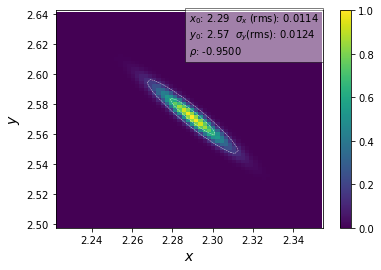

Time-Time


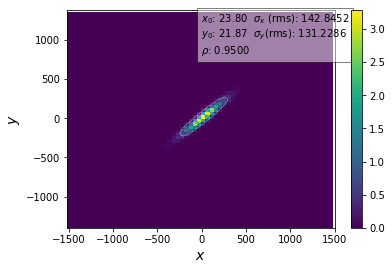

Shape (64, 64)


In [4]:
#Create sdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjQAAADQCAYAAAAQwfu+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3XtwVGWex/93pwVDSMimkyWRQFwTjZLMIoZwEdEJEJEf4ywsw0UzMOCltvzBgOBIEWZVHAG1hMw4KHgpEbYsnUJnlF1YtJgMw7iCXEIIStBIFGcXDAQSyAUSc+n+/cEvbZp0uk9fTp/nnP6+qqhKuk+Sh3Oe53O+fW6PzeVyuRBCCCGEMLEYoxsghBBCCBEqKWiEEEIIYXpS0AghhBDC9KSgEUIIIYTpSUEjhBBCCNOTgkYIIYQQpneN0Q0QQkRGW1sbK1eupKOjg87OTsaMGcOsWbM8ltmzZw9vvfUWDocDgMmTJzNx4kQjmiuEMCmjssam9Tk0TqeT4uJiHA4HxcXFHu+dP3+eDRs2cOnSJZxOJ0VFReTl5VFbW8vSpUsZNGgQADfddBP/9m//FlKDhRDBcblcfP/998TGxtLR0cFTTz3F/Pnzyc7Odi+zZ88evv76ax566CEDWyqEMDOjskbzEZqdO3eSnp5OS0tLj/f+9Kc/cfvttzNp0iROnTrFc889R15eHgBpaWmsXbs2bA0WQgTHZrMRGxsLQGdnJ52dndhsNoNbJYSwGqOyRlNBU1dXR3l5OdOnT2fHjh093rfZbFy+fBmAy5cvk5SUFN5WCiFo7/g/+lwzxOcyLS0t/OY3v3F/X1hYSGFhoft7p9PJ8uXLOXPmDPfccw833XRTj99x4MABvvjiC6677jrmzZtHSkpK+P4TQgjl+csafzkDxmSNplNOJSUl/Ou//istLS1s3769xymnCxcusHr1ai5dusT333/Pk08+SWZmJrW1tfzqV7/iuuuuo1+/ftx3330MHTq0x+8vLS2ltLQUgOeff567x64O6T8VaU039DO6CZaRcLLnEUCr+vO+JwL+mROnBvl8/6bB32n6PZcuXWLdunU88MADZGRkuF9vamoiNjaWPn36sGvXLj799FNWrlwZcDvNItJZI1lhHWbKqnBnjdacgchmjd8jNIcPHyYxMZHMzEwqKyu9LrN3714KCgr46U9/yldffcVLL71ESUkJSUlJbNy4kYSEBL755hvWrl1LSUkJcXFxHj/vrbozEzN1bKEvs+yw+vfvT05ODhUVFR4hk5CQ4P66sLCQt99+24jmWZZZssKofmyW9WMUs+RLd5HMGr8FTVVVFWVlZRw5coS2tjZaWlpYv349ixcvdi+ze/dufv3rXwOQnZ1Ne3s7TU1NJCYm0qdPHwAyMzNJTU2lpqaGrKwsn39Ty0aTji/0YMbA0KqxsRG73U7//v1pa2vj888/Z+rUqR7LXLhwwX3KuKysjMGDBxvR1IgJx/a2YhZZ8f9kBCvniS9GZY3fgqaoqIiioiIAKisr2b59u0cxA5CSksKxY8coKCjg1KlTtLe3M2DAABobG4mPjycmJoazZ89SU1NDampqyI2G8HUUGbjmFq2BEYwLFy6wYcMGnE4nLpeL22+/nREjRrB161aysrLIz8/nww8/pKysDLvdTnx8PAsWLDC62cqLdB+UzAqc5ERkGZU1mm/bhh8KmuLiYo+GnTp1itdee43W1lYA5syZw6233sr+/ft59913sdvtxMTEMHPmTPLz8/3+nTE/Lwn+f2QSVgolCYvg7H/7VwH/TLiuoRFXREPWCBHurFE1ZwJ6sF5ubi65ubkAzJ492/364MGDWbVqVY/lx4wZw5gxY0JsojVJESCEECIcrPQBORTypGAhdCZho67eto184BB6k1wIPylohNBIAih66LmtpVgyBzOP92jtY0oWNMF0pGjdgEIbM4eTsBbpi8IX2ZcFT8mCJhh6hIR0rMiKpqCXvqUGuW1bhELGsVosU9DoQYJK+COBJozsA9GeUTL+RHdS0IioJ6EozEr6rhA/ULKgkYfmCS0kzIUQ0UL2Z/4pWdCES6R2eNLRrpACQ5iNt7Er/ViEi+wbIsvSBU2kSAAKYR2R2AlJZhjPCsWG9CNPUtAIoQMVw7KtrY2VK1fS0dFBZ2cnY8aMYdasWR7LtLe38/LLL/PNN9+QkJDAkiVLGDhwoEEtti4V+4eILCsXI0ZljRQ0QvhgpR1Pnz59WLlyJbGxsXR0dPDUU08xfPhwsrOz3cvs3r2b/v3789JLL7F3717efvttli5damCr9RXKTsVKfUP0zsqFh16MyholC5ruQSGdSYRCdjo/sNlsxMbGAtDZ2UlnZyc2m81jmbKyMmbOnAlcmYvtzTffxOVy9VhOqJNNVu3jqqxfETijskbJgqa7cA9WGSRqs2o4gxp9z+l0snz5cs6cOcM999zDTTfd5PF+fX09ycnJANjtduLi4mhqamLAgAERad/ChQuJjY0lJiYGu93O888/7/H+6dOn2bhxIydPnuS+++7jX/7lX9zvVVRUsHnzZpxOJxMnTmTatGkRabPRVOhXQi0q5KgRWaN8QRNuKmzoq0U6kFRcB2Zj1E5kZ3OOz/cfBYqLi93fFxYWUlhY6P4+JiaGtWvXcunSJdatW8f//u//kpGR4X7f5XL1+J2RPjqzcuXKXkMtPj6eBx54gEOHDnm87nQ62bRpE0888QTJycmsWLGC/Px8Bg8eHIkmCxFWKmS0r6zxlzNgTNZEXUGjIhU6b7Sy4qfbq49qeNO/f39ycnKoqKjwCJnk5GTq6upITk6ms7OTy5cvEx8fr2dzA5KYmEhiYiLl5eUer1dXV5OWlkZqaioAY8eO5dChQ34LGjm9LcIl2nJcS85AZLNGyYLGV7BEW6cRvZMdUGAaGxux2+3079+ftrY2Pv/8c6ZOneqxzIgRI9izZw/Z2dns37+f3NzciB+hWbNmDQB33313j099vel++BquhOWJEyd6LFdaWkppaSnQM5Dldm3rsdr+wiz9x6isUbKg8UWPDWq1Tq8SswzAaHDhwgU2bNiA0+nE5XJx++23M2LECLZu3UpWVhb5+flMmDCBl19+mUWLFhEfH8+SJUsi2sZVq1bhcDhoaGhg9erVDBo0iJwc36fZQPvha2+HxiNJsiY6RVsOGpU1pito9BBtnU1Ep+uvv54XXnihx+uzZ892f923b18ee+yxSDbLg8PhAK6cWho5ciTV1dWaCpquw9dd6urqSEpK8vtzwYx9KUqsTfYHoTMqa6SgESLMZIcXnNbWVlwuF/369aO1tZXPPvuMGTNmaPrZrKwsampqqK2txeFwsG/fPhYvXqxLO1Xa4Zm9r6m0LoX5SUEjRC/MvrMwm4aGBtatWwdceXbFuHHjGD58OLt27QJg0qRJXLx4keLiYlpaWrDZbOzcuZPf/va3xMXF8eCDD7JmzRqcTifjx49nyJAhRv53IkIKAiE59QMpaISlyWA3j9TUVNauXdvj9UmTJrm//od/+AdeffVVrz+fl5dHXl6ebu0TQg+SUeGjZEGjZQPLJxNrs9ogl/4qhHWonk/RmjdKFjRaRKpDRWvH8Eb1QRxJ0i+sQe8+Lf0ksqyUUdJ3AmfagiZSrDRARE8SGkJPkh/RSXLFGJoLGqfTSXFxMQ6Hw+ORxwDnz59nw4YNXLp0CafTSVFRkftc9gcffMDu3buJiYnhgQceYPjw4eH9H4ioJsEhQuGv/0hBYn2SIdahuaDZuXMn6enptLT0HOB/+tOfuP3225k0aRKnTp3iueeeIy8vj1OnTrFv3z5++9vfcuHCBVatWsXvf/97YmJifP6tQDuYhI65SIAIs1Cpr1op51Rar8I6NBU0dXV1lJeXM336dHbs2NHjfZvNxuXLlwG4fPmy+4FWhw4dYuzYsfTp04eBAweSlpZGdXU12dnZYfwvGD84zBQ0Rq8rIURwZOyKLmba50SSpoJmy5YtzJkzx+vRGYCZM2eyevVqPvroI77//nuefPJJ4Mr8Kt2nDHc4HNTX1/f4eV/zq5iBBI3oIkEjhPBHckIffguaw4cPk5iYSGZmJpWVlV6X2bt3LwUFBfz0pz/lq6++4qWXXqKkpMTr/CreGD2/ihC9keARQoD6WSAfrDUUNFVVVZSVlXHkyBHa2tpoaWlh/fr1Ho8V3717N7/+9a8ByM7Opr29naamph7zq9TX17vnahEiklQPo0jounj/4sWL2Gw2CgsLmTJliscylZWVvPDCCwwcOBCA0aNHa55+wIzC2S9kh2IMK41tq/Qho7LGb0FTVFREUVGRuwHbt2/vMUdKSkoKx44do6CggFOnTtHe3s6AAQPIz89n/fr13HvvvVy4cIGamhpuvPHGkBosoo/ZA0uVkLLb7cydO5fMzExaWlooLi5m2LBhDB482GO5oUOH9riTUfhn9n4qQqPKOFeBUVkT9HNouk8D/otf/ILXXnuN//7v/wZgwYIF2Gw2hgwZwu23385jjz1GTEwMDz30kN87nCC0YJBOZaxoCXUz9rOkpCT3Bfv9+vUjPT2d+vr6HiETTbpvx2jpu8Kc49dMjMqagAqa3NxccnNzAc9pwAcPHsyqVau8/sz06dOZPn16CE0MjISSCJSZwm33+Vt8vv8oeHzi6e36tNraWk6ePOn1iOlXX33FsmXLSEpKYu7cuVExySMY2w+iLbfMNObMLJR+5StrtOYMRDZr5EnBwjIkJK/wd6dga2srJSUlzJ8/n7i4OI/3brjhBjZu3EhsbCzl5eWsXbuW9evX69lcgfRd4Z9qRa+WO5IjnTVS0AglSKBHRkdHByUlJdx5552MHj26x/vdQycvL49NmzbR2NjIgAEDItlMISxHtYJEb0ZkjZIFTbh2btHWgfQmRYe5uVwuXn31VdLT07n33nu9LnPx4kUSExOx2WxUV1fjdDpJSEiIcEuFUIfK+xFVM9morFGyoAkXVTe2sC6Vw6+qqoqPP/6YjIwMli1bBsD999/P+fPnAZg0aRL79+9n165d2O12+vbty5IlS7DZbEY2W1eBbi/JFPWoPOa0slq/MiprLF3QCBEOVghMgFtuuYV3333X5zKTJ09m8uTJEWqR+VilL4jwslpBEiqjskYKGhFVZIckRHST4sO6pKARpmPGokRCVE2R2C5m7K+RIuNCH9Ha56SgERFjtUEmYSy0kH4iQmG13NSTkgVNuDegBIp/Mmiknwgh9CH5GhlKFjThJp0p+khxIoQIlar7Dsk376KioBHmJINW6O3qHZb0OfNRtejQSvpc+EhBI8JOBqgwKzPvHEMZd2b+fxtN8k4dShY0enWQaB60MugiJ5r7WagWLlxIbGwsMTEx2O32HvPFuFwuNm/ezJEjR7j22mtZsGABmZmZwJUJczMyMgBISUlh+fLlEW+/kaTfaSd5aE1KFjR6kU4sQiE7jMhYuXJlr/O5HDlyhDNnzrB+/XpOnDjBG2+8wbPPPgtA3759Wbt2bUB/K9hMkL4QfpLPoYv2fhlVBY0Q3UX74DejsrIy7rrrLmw2G9nZ2Vy6dIkLFy6QlJQU0XbIzlfoTfIpcFLQCEsww+A3eid4/vx5NmzYwMWLF7HZbBQWFjJlyhSPZXyd0omUNWvWAHD33XdTWFjo8V59fT0pKSnu75OTk6mvrycpKYn29naKi4ux2+1MnTqVUaNG9fjdpaWllJaWAvQ4nSWEHozOJiNyx6iskYJGKMPogR8sowsVrex2O3PnziUzM5OWlhaKi4sZNmwYgwcPdi/j65ROJKxatQqHw0FDQwOrV69m0KBB5OTkuN93uVw9fqZrQruNGzficDg4e/YszzzzDBkZGaSlpXksW1hY2KNIEqI3KmaSGfLGqKyRgkaERMUBHw5mCI1AJSUluU/N9OvXj/T0dOrr6z1CxuhTOg6HA4DExERGjhxJdXW1R0GTnJzsnrEXoK6uzt22rp9NTU0lJyeHb7/9tkdBI6zLjFlkxZwB47JGyYJG745pxU5kxsEcSVbc5r0pLi52f93bEYna2lpOnjzJjTfe6PG6r1M6emttbcXlctGvXz9aW1v57LPPmDFjhscy+fn5fPTRR9xxxx2cOHGCuLg4kpKSaG5u5tprr6VPnz40NjZSVVXF1KlT/f7NSI4bq/bBaM8eq25Xf7TkDEQ2a5QsaPQW7QPQ7KI1QAC+OJPqdxl/14a0trZSUlLC/PnziYuL83jP1ykdvTU0NLBu3ToAOjs7GTduHMOHD2fXrl0ATJo0idtuu43y8nIWL15M3759WbBgAQCnT5/m9ddfJyYmBqfTybRp0zw+DapAckct0ZwjWvjLGi3XoEU6a6KyoBHGkzAxRkdHByUlJdx5552MHj26x/u+TunoLTU11ett15MmTXJ/bbPZePjhh3ssc/PNN1NSUhLw3+zqh1JsqEcyIjCq9WEjskYKGqGZBExgVAsYl8vFq6++Snp6Ovfee6/XZXo7pWN10reFalTLj0AYlTVKFjR6h4uZO4oEr/HM2n+qqqr4+OOPycjIYNmyZQDcf//97k9Jvk7pCCGCY2ReGLW/MCprlCxo9CZFgfDGrIWKVrfccgvvvvuuz2V6O6UjRLRSLRfMsP8yKms0FzROp5Pi4mIcDofH1c0AW7ZsobKyEoC2tjYaGhrYsmULIPOrCOOoFkRdzBBIQpiVquPeG8mC8NJc0OzcuZP09HRaWnp2lvnz57u//vDDDzl58qT7+2DmVxGiO7MElIST+WjtW7JtQ2OWMRwM6Rvq0FTQ1NXVUV5ezvTp09mxY4fPZffu3cusWbPC0jhhHWYONAksYeb+K3onY9taNBU0W7ZsYc6cOV6PznR37tw5amtr+dGPfuR+TeZXMS8rh7gEmRDmImPWNyvntVZ+C5rDhw+TmJhIZmam+zqZ3uzdu5cxY8YQExPjfi2Y+VXkScHSOYNhhu0q1KJnn7HKGJZxZQyr9J9I8lvQVFVVUVZWxpEjR2hra6OlpYX169ezePHiHsvu27ePhx56yOM1FedXkY6iPglRYXbShwVE523bRvFb0BQVFVFUVARAZWUl27dv91rMfPfdd1y6dIns7Gz3a8HOryLML9oGkj9SRAthXiqNX8nW3gX9HJqtW7eSlZVFfn4+AJ988gljx471mIvBDPOriB/IQAlcsEF3zdenw9wSIcTVVCpEvJHMDa+ACprc3Fxyc3OBK8+X6c7bnU2hzq8STtKxRSBC6S9SrAihnerZrJVkuPGi5knB0tkEhB6eWouVjqz0kP6OiAyr7ExF6GQfYX5RU9AIawrXDimQoypaipXewrE5Pcbr65GyceNGysvLSUxM9Hr0tLKykhdeeIGBAwcCMHr0aGbMmBHpZgqhiRQhP1CpODcqZ6SgEcoI54AM5rSP1qMqgRQrlwc7r3rFyTWDLgfatLApKChg8uTJbNiwoddlhg4d2mN6E6vq2pYq7QysQAqN0Jn5+jyjckYKGhFWeu0Ygh2kgZz68RXCwRYr1wBD085qboPecnJyqK2tNboZypEdsNCbHgWKt3zr/ppR/dqonJGCJsoZ8ck01E8QgV6fEmihAqEXKxNSvvTZpinxx4GXfS4TrO6feq5+aKUWX331FcuWLSMpKYm5c+cyZMiQcDdRCFMKR16GUqCA9iPEPTMsvFTMGSULmnB0GjN94jLT4e5wHs4M9sJZf9tWe5ECvZ0CCqVYga6CJfw6vovzu0wo04fccMMNbNy4kdjYWMrLy1m7di3r168P+vcJoZJIntbuLd+CLVDAe4Z5y69wHBX2lzUq5oySBU04mKlI0EukzqWGckePlsLT14W0vRUp0HOgd3V2FQsVVcTF/RBieXl5bNq0icbGRgYMGGBgq0Q00jvDQ70RwNtr4TkarL1I0XYkGPQ6GhwsvXJGyYJGhYuarCzctxQHcjTM310+gRQo4L9IAW2FCuhfrOxszvH4/lFd/1pwLl68SGJiIjabjerqapxOJwkJCUY3SzeB7DTNdNQ3nFT6cBjovsFX1vX2XrBHgEF7cQLR/cFKr5xRsqAJZodr1iLIqOeVBBvOWm877v38be/FCWgrUECdIgV6Fire7D5/S4/XjChoXnzxRY4fP05TUxOPPPIIs2bNoqOjA4BJkyaxf/9+du3ahd1up2/fvixZssTj6d9Wc83XpzWPQZV27CoJd/YGU4R0p89R3yvMWJzsbM6JeNYYlTNKFjSB7Gy7QsasDzLT81NfsM888X0x2Q/v+br9WGth0kVrgdIlkp9Q/BUs3ooVgC/OpPZ4zeO89LiQmhWUJUuW+Hx/8uTJTJ48OUKtMV6wuWHWD1C9CSU/g/nZYHJPS575uxDWV2aF60MUqPFBqnsuRbqgMSpnlCxoAtkRN6f317ElatJ+9br2w58ey3T7OpCLywItSroYcfhUy1EVCKFY+f/FnfLsy32B+NP63n0gtAv6A8UNN2pe1IgjO5E8PRbMByetGaYlr/T40KRqJnnLI01ZZMCHJyMoWdC0jWoOaHktd36oJNQHq3nbaKFe1R5sMdKdCud1Qy1UINzFypXv5XSFmur/9bLu+RHpD116364bbH4Fk1Gh5JLReRRsgQKBZVDfbt97+7CUcLIFFvttiiUoWdAE3PHT9GmHKsJRbPhi9MD3RWuB0iXQQgW0FytwdWD88LW/gsVqpyj0snDhQmJjY4mJicFut/e4NdTlcrF582aOHDnCtddey4IFC8jMzARgz549vP/++wBMnz6dgoIC/3/vR3+DH/nuNyHL0+9XR5JeOWSV/AnnhyR/RQpI5nijZEGj9w7cjFQe9FoFWpyA/x1NIEUK9CxUwPeRFQhfcJj1Oq9IW7lyZa+3bx45coQzZ86wfv16Tpw4wRtvvMGzzz5Lc3Mzf/zjH90FUHFxMfn5+cTHx/v8W13jytf4CqbfmpEVMsYboz4UgfcCBXwVKZd8ti2Qh/JFY94oWdBYdWBZQSjhruVTcG+BAb5PLWo7ogKBFCpdpGBRR1lZGXfddRc2m43s7GwuXbrEhQsXqKysZNiwYe4CZtiwYVRUVDBuXOgXD0geRU6oxaNeGdNbYQK+r4nzV6BAeIuUaH20QBclCxoRXuH8hKn10Lyv0OgSSIECvooU0LNQgcjdySFgzZo1ANx99909HqdeX19PSkqK+/vk5GTq6+upr68nOTnZ/brD4aC+vr7H7y4tLaW0tBS48qTT7mNDChdPeh+ZCuQ0X6h5AsEXJaCtMIHgnh4crlvRhaIFTaADSeUgUuFwdbDXB4QjRMB7cQLaCxQI7KLacD58yxcJmfBbtWoVDoeDhoYGVq9ezaBBg8jJ+WEMuVyuHj/T2/MrvL1+9Zwz3cdGIOPEjKfF9bpOSEtOXE3rhdi+ipAuWu8a1FqUdNGrOAHJDr0oWdBoGXjdA0WFosEfXS86RN9QAf9FCfgKluCLky7BXOCm95QMIvwcDgcAiYmJjBw5kurqao+CJjk5mfPnz7u/r6urIykpCYfDwfHjP3ywqa+v9/i53nxefkNQ7fxiUODjzUjhvpOrex74Kja6C+ZxBYEWId2Feqo4kPyQvFCDkgWNlp1zMDtwswklhHorQLrTeqHaFb3cDhiEUK6+D8d1KhI+amptbcXlctGvXz9aW1v57LPPmDFjhscy+fn5fPTRR9xxxx2cOHGCuLg4kpKSGD58OH/4wx9obr7yyIejR49SVFTk928OPBBsa3uOzWAfZBlOkXrGUSiFRm/C/aFFThNHHyULmr4Hfd+Z0J3ez1wIhpZiQovePvloCy1fF6qF55ko4botUIoUAdDQ0MC6desA6OzsZNy4cQwfPpxdu3YBVx6Zftttt1FeXs7ixYvp27cvCxYsACA+Pp6f/exnrFixAoAZM2b4vcMJwvt8oISTYftVStDjtt9wFyBXi7YckOdbeVKyoAnkU0a8krfah1ZkRaKTRjqsgmXVgJIg6ik1NZW1a9f2eH3SpEnur202Gw8//LDXn58wYQITJkzQrX1grmd7hDoeI3XXnlXHeCgkH4KjZEEjG/MKI8JTzxCLpuBStQ9v3LiR8vJyEhMTKSkp6fG+rwfXCevfmh9NYzSSIp0HRm9Ho3JGyYLGTJ+CjGa22bqtQtWCxZ+CggImT57Mhg0bvL7f24PrrCra+7EInJFj3yz91aicUbKgCcdOOpxFkdU+lZllUBjFrMWKFjk5OdTW1vb6fm8PrktKSopgK4XQnyrj3Ip5bFTOaC5onE4nxcXFOBwOiouLPd7bsmULlZWVALS1tdHQ0MCWLVuA4OZXCQcrFCFW7OhGUiHAQt2mWi447z4+r37uij+9PbhOChqhGhXGszdWyW1/WaNizmguaHbu3El6ejotLT070fz5891ff/jhh5w8eeVy/2DnV7FKhxCRo0q4qdB3r57QMRCBPLhOCK1UGZ+BUmE8q0rFnNFU0NTV1VFeXs706dPZsWOHz2X37t3LrFmzAKioqNBtfhVhfSqGoNUDrrcH11lVb33MKttZxTFkBKtsz96YbTvrlTOaCpotW7YwZ84cr0dnujt37hy1tbX86Ec/Agh6fhVhTaoPOquHnha9Pbgu2qjeV6NJNI9Lq/ZDvXLGb0Fz+PBhEhMTyczMdF8n05u9e/cyZswYYmJ6P/emZX4VoTYzDrJoDsXuXnzxRY4fP05TUxOPPPIIs2bNoqOjA/D94Doh/JExpk0k89OobWJUzvgtaKqqqigrK+PIkSO0tbXR0tLC+vXrWbx4cY9l9+3bx0MPPeT+Ptj5VYT+zFiUeCMhGpglS5b4fN/Xg+usKNT+E6lxJP1cXUZkqer9waic8VvQFBUVuedEqaysZPv27V6Lme+++45Lly6RnZ3tfi3Y+VWEJ6sUH4FQfcAGKhq3YTSwWj+NdkaPU+lPoQn6OTRbt24lKyuL/Px8AD755BPGjh3rcUpJhflVhBqiYaBKvxVCDSqNxWjIPlUEVNDk5uaSm5sLwOzZsz3e67qz6WqRmF9FRFa0DlCVQlIIKzLDGIvW/DMDJZ8ULPQng9KTGYJUCBVYaaxYMQettH0CJQWNyVhxAOrN6AEu20xdRvcNEbpoGV/SV/2TgiZA0TJ4zEKFQS59QojAybi5QoVErC3IAAAYXklEQVQMswolCxrp6EKlQS79UUQj6ffBiXR2yXb6gZIFjbAelQqUq0kgRC/Z9sIfo7JL+mbgpKARQVG5QOlOQkEI0UWF3JJM0o8UNFFOhQEeLAkGIaKPapklOaQOKWhMTLWBHS5WCgjVtlFFRQWbN2/G6XQyceJEpk2b5vH+nj17eOutt3A4HABMnjyZiRMnGtFUYSGqjQNfrJI/Rq9zI7JGChodGN2RVGSVkPDGLNvb6XSyadMmnnjiCZKTk1mxYgX5+fkMHjzYY7mxY8d6zMkmrM0s/TcYVs0d1beZUVmjZEGj+sYS1g0Kb6zSH6urq0lLSyM1NRW4EiaHDh3qETLRxCrb1soka8zHqKxRsqARkRVNgeGNmWbLjT/t9LtMcXGx++vCwkIKCwuBK7PdJycnu99LTk7mxIkTPX7+wIEDfPHFF1x33XXMmzePlJSUoNoqole0Z8rVzDgru7+s6S1nwLiskYLGAiQ8emfkJx6jtsvzzz/v9XWXy9Xjte6TyQKMGDGCO+64gz59+rBr1y42bNjAypUrdWmniDzJivCJZLaouN16yxkwLmukoIkwFTumWRl9eNZs2zI5OZm6ujr393V1dSQlJXksk5CQ4P66sLCQt99+O2Ltgyvn3ouLi3E4HB6fAAHOnTvHK6+8QmNjI/Hx8SxatMj9KXD27NlkZGQAkJKSwvLlyzX9PbNtQ6GPaPzgoyejskbJgsaKG1gExuhipYuV+mJWVhY1NTXU1tbicDjYt28fixcv9ljmwoUL7uApKyuL+PU1O3fuJD09nZaWntv/rbfe4q677qKgoIBjx47xzjvvsGjRIgD69u3L2rVrI9pWoSYVssNKuREMo7JGyYJGWJMKQXO1aAoeu93Ogw8+yJo1a3A6nYwfP54hQ4awdetWsrKyyM/P58MPP6SsrAy73U58fDwLFiyIWPvq6uooLy9n+vTp7Nixo8f7p06dYt68eQDk5uZKAWNRKuYERFdWhMqorJGCRoRE1fDpIiHkKS8vj7y8PI/XZs+e7f66qKiIoqKiSDcLgC1btjBnzhyvR2cArr/+eg4cOMCUKVM4ePAgLS0tNDU1kZCQQHt7O8XFxdjtdqZOncqoUaO8/o7S0lJKS0sB39cAiMCongPeWCUbVF33RmSNFDTCTdWB0RuzBpLZ1nMkHD58mMTERDIzM6msrPS6zNy5c3nzzTfZs2cPQ4cOxeFwYLfbAdi4cSMOh4OzZ8/yzDPPkJGRQVpaWo/fcfXdGFYWLf3MrDmgRbRsw3CRgsaCrDAIrBBSVtgOkVJVVUVZWRlHjhyhra2NlpYW1q9f73He3eFw8PjjjwPQ2trKgQMHiIuLc78HkJqaSk5ODt9++63XguZqso3UYIXxHohI9LtoW6cgBY0yoiVYrTTIomWbRUL3w8+VlZVs3769x0WEXXc3xcTE8MEHHzB+/HgAmpubufbaa+nTpw+NjY1UVVUxderUiP8foo2VxnK4mPF5M1YiBc1VZCcVOCsPLukPxup+EeHx48d55513sNlsDB061P3I9NOnT/P6668TExOD0+lk2rRpUfn0YyuPQyNFOgNkOwZPyYJGdiLGiqYBJWGlntzcXHJzcwHPiwjHjBnDmDFjeix/8803U1JSEtTfku0RXeR5M9amZEEjwkMGkHEBJuteCH2p8sFXxro6pKBRmAwU/+QTlxDmpEpB4o2Zx7bK61VvUtCEyMwdX3VGD0zZtkJ4MnpMBsNK49iM6z+SNBc0vuZYAdi3bx/vvfceNpuN66+/nkcffRQIbo4VK3VA0ZNKg1L6mjArlcZRpFh5vEbj9gw3zQWNrzlWampq2LZtG6tWrSI+Pp6Ghgb3ezLHSvRQcUBaOQBF6FTss1YWjeNRnjkTOZoKGn9zrPzlL3/hnnvuIT4+HoDExMTwtlIYwgxhb7aBbPQ6raioYPPmzTidTiZOnMi0adM83m9vb+fll1/mm2++ISEhgSVLljBw4ECDWitUYLYxFinyzBnfjMgaTQWNvzlWvvvuOwCefPJJnE4nM2fOZPjw4e5Ga5ljRejP6J1poMw6kEHNde10Otm0aRNPPPEEycnJrFixgvz8fI9ntuzevZv+/fvz0ksvsXfvXt5++22WLl1qYKvF1cw8LlRmxJi16rY0Kmv8FjRa5lhxOp3U1NSwcuVK6uvreeqppygpKaF///6a5liRCeO0U3FHGQwrDGSzbYvq6mrS0tJITU0FYOzYsRw6dMgjZMrKypg5cyZw5bkvb775Ji6XC5vNZkib9WaFfii8kzsgjWNU1vgtaLTOsZKdnc0111zDwIEDGTRoEDU1Ndx4442a5lix+oRxZtvxhcJqA9mM2677Rfvdx1Z9fT3Jycnu95KTkzlx4oTHz3Zfxm63ExcXR1NTEwMGDIhAy4XwTpVxaLZ803O99ZYzYFzW+C1otMyxMmrUKD755BMKCgpobGykpqaG1NRUJeZYUWUgmJnZBnGgItlHQl2XWtra21FOl8vV47WrPw1pWUaIQKmcw2bONz3Xq7/f7etsilFZE/RzaLrPsXLrrbdy9OhRli5dSkxMDHPmzCEhIYGqqqqg5lhRufNbhZkHcaBkeoMrkpOTqaurc39fV1dHUlKS12WSk5Pp7Ozk8uXL7ov9RXQxaw6rOv4CZdb1D8ZlTUAFTW9zrNhsNubNm8e8efM8lg9ljhWhjVUGbyhkegNtsrKyqKmpoba2FofDwb59+3ocbR0xYgR79uwhOzub/fv3k5ubK0doFGHmHVwwzDa+AqH3tjR63RmVNfKkYIMZ3fHMQC7uCw+73c6DDz7ImjVrcDqdjB8/niFDhngcbZ0wYQIvv/wyixYtIj4+niVLlhjdbF1FW5EQaVYaP1pZvVjRwqiskYJGIzN0IjNSYYcSTds2Ly+PvLw8j9e6H23t27cvjz32WKSbJRQSTeNBKzNdZ6cKI7JGyYLGKhs0mqlQqHSR/iTMTvpw+MlzZ6xHyYJGqEulQqWLmUJCxfUXzczUd4RvcmpaSEEjlN/JmjEsVF+nQqhMlfFjtuxRZb0ZRQoaCzJbpzZbaHQx23oWIpJUHR9mzRtQd52qQgoaRVml45o5PLpYZVsI4Y8Z+7oVMgbMue5VIwVNmEVLp7RKiHSRmXOFyiRXzE1u5Y4MSxc00RIC4WTlgSG3XoqrSUaEX7T1/Uj0oWhbp8FSsqCRkAmfaBoIMsWBEMGT/uxJjtqaj5IFjfAu2ju+THEgopX0wfCQDz3WJgVNhEkH7508R0JEmmx3c5PM8C3aznZIQeOHGTqtGagwsGRb+tbc3Mzvfvc7zp07xz/+4z+ydOlSr7Pfzp49m4yMDABSUlJYvnx52NrgdDopLi7G4XBQXFzs8d65c+d45ZVXaGxsJD4+nkWLFpGcnAzAnj17eP/99wGYPn06BQUFYWuTiBzJicCpsM4CoWfOKFnQmK1DRTuVBpQZ+o5K66u7bdu28c///M9MmzaNbdu2sW3bNubMmdNjub59+7J27Vpd2rBz507S09Npaem5jt566y3uuusuCgoKOHbsGO+88w6LFi2iubmZP/7xjzz//PMAFBcXk5+f7zUkhf5U7d9myAZvVF2fwdIzZ5QsaIQ6VBtMZgol1dadP4cOHeLpp58G4Mc//jFPP/2016DRS11dHeXl5UyfPp0dO3b0eP/UqVPMmzcPgNzcXHfYVVRUMGzYMHcBM2zYMCoqKhg3blzE2m4FZuuvZsqC3ui1zlVeN3rmjBQ0UUj14FJ5MF5N9XUZiIaGBpKSkgBISkqisbHR63Lt7e0UFxdjt9uZOnUqo0aNCsvf37JlC3PmzPF6dAbg+uuv58CBA0yZMoWDBw/S0tJCU1MT9fX17lNPAA6Hg/r6+rC0SSVW6mtXM9OY10qePeOdnjkjBY0FmCnozDoIVVnH13x92u8y3a89KSwspLCw0P39qlWruHjxYo+fue+++zS3YePGjTgcDs6ePcszzzxDRkYGaWlpmn/em8OHD5OYmEhmZiaVlZVel5k7dy5vvvkme/bsYejQoTgcDux2u9dlbTab19dLS0spLS0F4Pnnn1dmu1qFWcd3oKLh2TP+skbFnJGCRiFWCFejB2GorBBUXdeSePPkk0/2+l5iYiIXLlwgKSmJCxcuMGDAAK/LORwOAFJTU8nJyeHbb78NuaCpqqqirKyMI0eO0NbWRktLC+vXr2fx4sUef/fxxx8HoLW1lQMHDhAXF4fD4eD48ePu5err68nJyfH6d64OXvEDs4/dcJCHb2qnYs5IQRNGVihIemP2wdedPDDLu/z8fP72t78xbdo0/va3vzFy5MgeyzQ3N3PttdfSp08fGhsbqaqqYurUqSH/7aKiIoqKigCorKxk+/btHsUM4L67KSYmhg8++IDx48cDMHz4cP7whz/Q3NwMwNGjR92/y2rM1qdUIc+fUYeeORN1BY2Vi45gWHXgySetwE2bNo3f/e537N69m5SUFB577DEAvv76a/785z/zyCOPcPr0aV5//XViYmJwOp1MmzaNwYMH69amrVu3kpWVRX5+PsePH+edd97BZrMxdOhQHnroIQDi4+P52c9+xooVKwCYMWOG5jucrLLtopE8aLN3Ku/n9MwZm8vlcun9HwjU3WNXG90EUzPDgAsHsxct+9/+VcA/8/+k/r8+3//w7CvBNicqjfl5idFNEKixAzZTbga6vv6874mA/4avrFE1Z6LuCI0ZmWmghZMRIRet61qIcFChMLmaGce0iuvRDKSgiSAzDiw9yWPLhVCHmXaiZh+/0fj8mUiQgkajaO8owTA6IFXeZkavG2FuVuo/Ko/TYOi5bay2rsLNtAWNbFhjqRKoqvcDVdaT8E62T3ipPh5DJQ/LU5vmgsbXpHEA+/bt47333sNms3H99dfz6KOPAsFNGicb1ViqhbwZ+oNq60yIYJhhrOnFCs+ginaaCxpfk8bV1NSwbds2Vq1aRXx8PA0NDQAyaZxCVN7hmmmQq7weRfQx09gxitnvhhTaaSpo/E0a95e//IV77rnHXagkJiYCMmmc3syyczXjIJdDy8IX2X7GkjsgezLL/kBPmgoaf5PGfffdd8CVxx07nU5mzpzJ8OHDNU8ad/X8KtHKrB1S9YHuixQu0U22jxqMzj6z9AOj15Pq/BY0WiaNczqd1NTUsHLlSurr63nqqacoKfH+wCpvk8ZZaX4Vq3U4swx0X2SqAyEiQ7X8M9uY1GP9mW0dhMJvQaN10rjs7GyuueYaBg4cyKBBg6ipqQlo0jijqTYQI8FKHV3OkwsRHqpnoZnHnzx/Rl9+Cxotk8aNGjWKTz75hIKCAhobG6mpqSE1NZW0tLSgJo1TfUCpzModWyaYE8I7M2emlcaZFCzGCvo5NN0njbv11ls5evQoS5cuJSYmhjlz5pCQkAAQ9KRx4gfR1JnlYj/jfPrpp7z33nucPn2aZ599lqysLK/LVVRUsHnzZpxOJxMnTmTatGkRbqnazFxchMrKY0mutwsPPXMmoIImNzeX3NxcAGbPnu1+3WazMW/ePObNm9fjZyZMmMCECRMC+TOWFi2dtjcyQ666hgwZwuOPP87rr7/e6zJOp5NNmzbxxBNPkJyczIoVK8jPz9d1xm09RXPx4Uu0jRd5Bk3k6Jkzpn1SsEqko/5AhR2EittDhfXij5aipLq6mrS0NFJTUwEYO3Yshw4dMm1BY3UqjoVIivbT1Crmjp45o2RBE8xU50JEgw/PvuLz/ZaWFn7zm9+4vw/3HYRXP4ohOTmZEydOhO33R5pkjRDe+coaVXNGyYJGT8XFxco+60baFhxp2w/69evn8++tWrWKixcv9nj9vvvuY+TIkX5/v8vl6vGat0cxiOBJfw6OtC1yVM2ZqCtohIhmTz75ZEg/n5ycTF1dnfv7uro6kpKSQm2WEMJCjMqZmJD+qhAiqmRlZVFTU0NtbS0dHR3s27eP/Px8o5slhLCQYHPG/vTTTz+tf/PUkpmZaXQTeiVtC460LXQHDx5k1apVfPfddxw8eJDPP/+cu+66i/r6el588UXuvPNOYmJiSEtL46WXXuKjjz7izjvvZMyYMUY33XJU7jPStuCo3LZI0jNnbC5vJ6uEEEIIIUxETjkJIYQQwvSkoBFCCCGE6VnmLqfz58+zYcMGLl68iM1mo7CwkClTpngs8z//8z/853/+JwCxsbE8/PDD/NM//ROg7+PcQ23bwoULiY2NJSYmBrvdHtbb/7S07dChQ2zduhWbzYbdbmf+/PnccsstAOzZs4f3338fgOnTp1NQUKBEu2bPnk1GRgYAKSkpLF++PCzt0tq2LtXV1fz7v/87S5cudZ8D1mudCbVp6TeVlZW88MILDBw4EIDRo0czY8YMQL+MCrVdRudTV/u2bNlCZ2cnCQkJ7mekGJ3rvtqm53qLWi6LqK+vd3399dcul8vlunz5smvx4sWu//u///NY5ssvv3Q1NTW5XC6Xq7y83LVixQqXy+VydXZ2un75y1+6zpw542pvb3c9/vjjPX7WqLa5XC7XggULXA0NDWFrT6Bta2lpcTmdTpfL5XJ9++23rkcffdTlcrlcTU1NroULF7qampo8vja6XS6XyzVnzpywtCPYtrlcV/rV008/7Xr22Wddn376qcvl0nedCbVp6TfHjh1zPffccz1+Vs+MCqVdLpfx+dTc3OxasmSJ69y5cy6Xy+W6ePGiy+VSI9d7a5vLpe96i1aWOeWUlJTkvoq8X79+pKenU19f77HMzTff7J4c86abbnLf5979McvXXHON+zHLKrRNb1raFhsb636o0ffff+/+uqKigmHDhhEfH098fDzDhg2joqLC8HbpTUvbAD788ENGjx7NgAED3K/puc6E2rT2G2/0zKhQ2qU3LW375JNPGD16NCkpKQAkJiYCauR6b20T+rDMKafuamtrOXnyJDfeeGOvy+zevZvbbrsNiOzj3ANtW5c1a9YAcPfdd4f1EdNa23bw4EHeeecdGhoa3LOnX73eHA6HLkEYaLsA2tvbKS4uxm63M3XqVEaNGhX2dvlqW319PQcPHmTlypW88sorHq9HYp0Jtfnq01999RXLli0jKSmJuXPnMmTIkIhlVKDt6mJkPtXU1NDR0cHTTz9NS0sLU6ZM4cc//rESud5b27pEYr1FE8sVNK2trZSUlDB//nzi4uK8LnPs2DH++te/8swzzwCRe5x7MG2DK4+RdjgcNDQ0sHr1agYNGkROTk5E2zZq1ChGjRrF8ePH2bp1a69Pggz3egu2XRs3bsThcHD27FmeeeYZMjIySEtLi1jbtmzZws9//nNiYvwfBJWpA6KLr35zww03sHHjRmJjYykvL2ft2rWsX78+IhkVTLvA+Hzq7Ozk5MmTPPnkk7S1tfHEE09w0003KZHrvbVt0KBBEVlv0cYyp5wAOjo6KCkp4c4772T06NFel/n73//Oa6+9xrJly0hISAAi8zj3YNsGVz7Fw5XDlSNHjqS6ujribeuSk5PDmTNnaGxsxOFweKy3+vr6sK63YNsFP6yz1NRUcnJy+Pbbb8PWLi1t+/rrr/n973/PwoUL2b9/P2+88QYHDx7UfZ0JtfnrN3FxccTGxgKQl5dHZ2cnjY2NumdUsO0C4/MpOTmZW2+9ldjYWAYMGMDQoUP5+9//rkSu99Y20H+9RSPLFDQul4tXX32V9PR07r33Xq/LnD9/nnXr1vHLX/6SQYMGuV/X+3HuobSttbWVlpYW99efffaZ++6dSLXtzJkz7k8733zzDR0dHSQkJDB8+HCOHj1Kc3Mzzc3NHD16lOHDhxverubmZtrb2wFobGykqqpK05T14Wzbhg0b3P/GjBnDww8/zKhRo3RdZ0JtWvrNxYsX3X26uroap9NJQkKCrhkVSrtUyKf8/Hy+/PJLOjs7+f7776muriY9PV2JXO+tbXqvt2hlmScFf/nllzz11FNkZGS4Dyvef//9nD9/HoBJkybx6quvcuDAAfcFWt1vlSsvL+c//uM/cDqdjB8/nunTpyvRtrNnz7Ju3TrgyuHLcePGRbxt27Zt4+OPP8Zut9O3b1/mzp3rvj169+7dfPDBB8CVW5DHjx9veLuqqqp4/fXXiYmJwel08pOf/IQJEyaEpV1a29bdhg0bGDFihPu2bb3WmVCbln7z0UcfsWvXLnef/sUvfsHNN98M6JdRobRLhXwC+K//+i/++te/EhMTw4QJE/jJT34CGJ/rvbVN7/UWrSxT0AghhBAielnmlJMQQgghopcUNEIIIYQwPSlohBBCCGF6UtAIIYQQwvSkoBFCCCGE6UlBI4QQQgjTk4JGCCGEEKb3/wEUIfOmO442zQAAAABJRU5ErkJggg==tate
lambda_i0,sigma_li=0.82251,0.00409 #idler
lambda_s0,sigma_ls=0.7324,0.00353   #signal
rho=-0.95

lambda_g0,sigma_lg=0.775,0.00177 #gate
lambda_g0,sigma_lg=0.775,0.00131

wi0,sigma_i=w2f(lambda_i0,dx=sigma_li)
ws0,sigma_s=w2f(lambda_s0,dx=sigma_ls)
wg0,sigma_g=w2f(lambda_g0,dx=sigma_lg)

print('Gate Length',0.5/sigma_g)

Wi,Ws,F_source=gaussian_state(wi0,ws0,sigma_i,sigma_s,rho,Ai=0,As=0,Ap=0,
                              Nsamples=[64,64],Nsigma=[2.5,2.5])
Ti,Ts,f_source=fft_state_2D(Wi,Ws,F_source)
if 0:
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[0].pcolormesh(Wi,Ws,np.abs(F_source)**2)
    ax[1].pcolormesh(Ti,Ts,np.abs(f_source)**2)
    plt.show()

print('\nFrequency-Frequency')
plot_gaussian(Wi,Ws,np.abs(F_source)**2,fit=True,text_box=1)
print('Time-Time')
plot_gaussian(Ti,Ts,np.abs(f_source)**2,fit=True,text_box=1)


print('Shape',F_source.shape)
#print(Ts.max())

## Calculate JTI using double upconversion

(20, 20)
Iteration: 19Wall time: 11.3 s


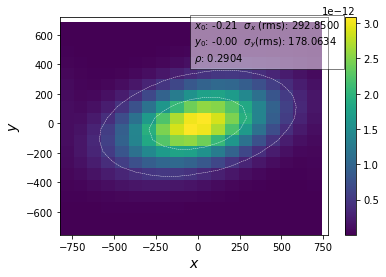

In [5]:
Wi,Ws,F_source=gaussian_state(wi0,ws0,sigma_i,sigma_s,rho,Ai=10000,As=0,Ap=0,
                                  Nsamples=[20,20],Nsigma=[1.5,1.5])

%time Ti,Ts,JTI=model_double_upconversion(Wi,Ws,F_source,wg0,sigma_g)
out=plot_gaussian(Ti,Ts,JTI,fit=True,text_box=True)

In [6]:
#Expected width
A=10000
print(np.sqrt(1/(4*sigma_g**2)+1/(4*(1-rho**2)*sigma_i**2)+4*A**2*sigma_i**2))

294.03556662137953


(20, 20)
Iteration: 19

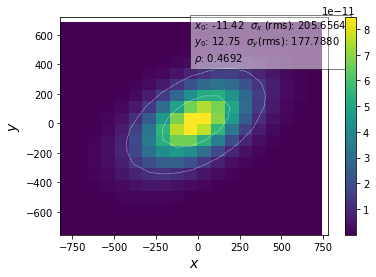

In [7]:
Ti,Ts,JTI=model_double_upconversion(Wi,Ws,F_source,wg0,sigma_g,add_phase_matching=True)
out=plot_gaussian(Ti,Ts,JTI,fit=True,text_box=True)

We observe a redution in the marginal and an increase in correlations when phase-matching is included. The method above however is very slow and takes a considerable amount of time when the grid gets larger than 20x20.

# Fast double upconversion

This method is fast but can't calculate with phase matching. It uses fftconvolve to speed up the calculation.


Frequency-Frequency


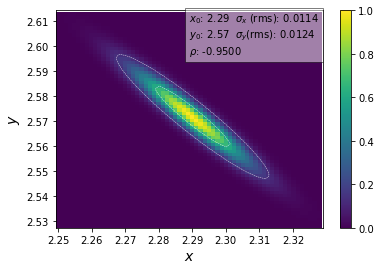

Time-Time


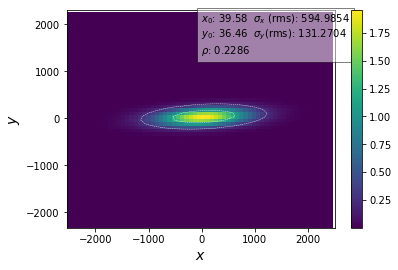

In [8]:
lambda_i0,sigma_li=0.82251,0.00409 #idler
lambda_s0,sigma_ls=0.7324,0.00353   #signal
rho=-0.95

lambda_g0,sigma_lg=0.775,0.00177 #gate
lambda_g0,sigma_lg=0.775,0.00131

L=1e3

wi0,sigma_i=w2f(lambda_i0,dx=sigma_li)
ws0,sigma_s=w2f(lambda_s0,dx=sigma_ls)
wg0,sigma_g=w2f(lambda_g0,dx=sigma_lg)

Wi,Ws,F_source=gaussian_state(wi0,ws0,sigma_i,sigma_s,rho,Ai=25000,As=0,Ap=0,
                              Nsamples=[64,64],Nsigma=[1.5,1.5])
Ti,Ts,f_source=fft_state_2D(Wi,Ws,F_source)

print('\nFrequency-Frequency')
plot_gaussian(Wi,Ws,np.abs(F_source)**2,fit=True,text_box=1)
print('Time-Time')
out=plot_gaussian(Ti,Ts,np.abs(f_source)**2,fit=True,text_box=1)

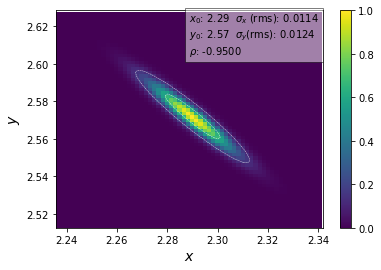

(64, 64)
Iteration: 63

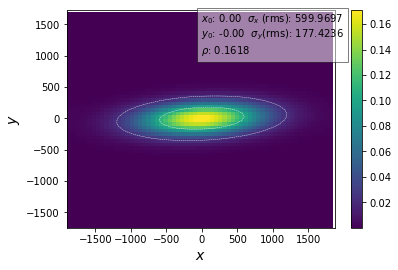

In [9]:
Wi,Ws,F_source=gaussian_state(wi0,ws0,sigma_i,sigma_s,rho,Ai=25000,As=0,Ap=0,
                                  Nsamples=[64,64],Nsigma=[2.0,2.0])
plot_gaussian(Wi,Ws,np.abs(F_source)**2,fit=True,text_box=True)

Ti,Ts,JTI=fast_double_upconversion(Wi,Ws,F_source,wg0,sigma_g)
out=plot_gaussian(Ti,Ts,JTI,fit=True,text_box=True)



In [10]:
#Expected width
A=25000

print(np.sqrt(1/(4*sigma_g**2)+1/(4*(1-rho**2)*sigma_i**2)+4*A**2*sigma_i**2))

598.9918122696095
